In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

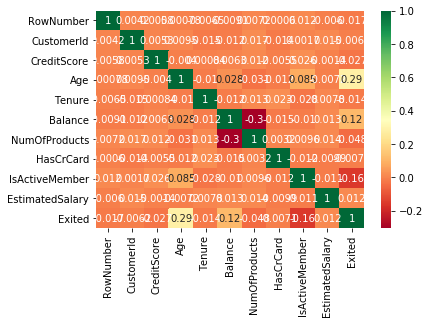

In [5]:
# Without assignning figuresize 
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn')

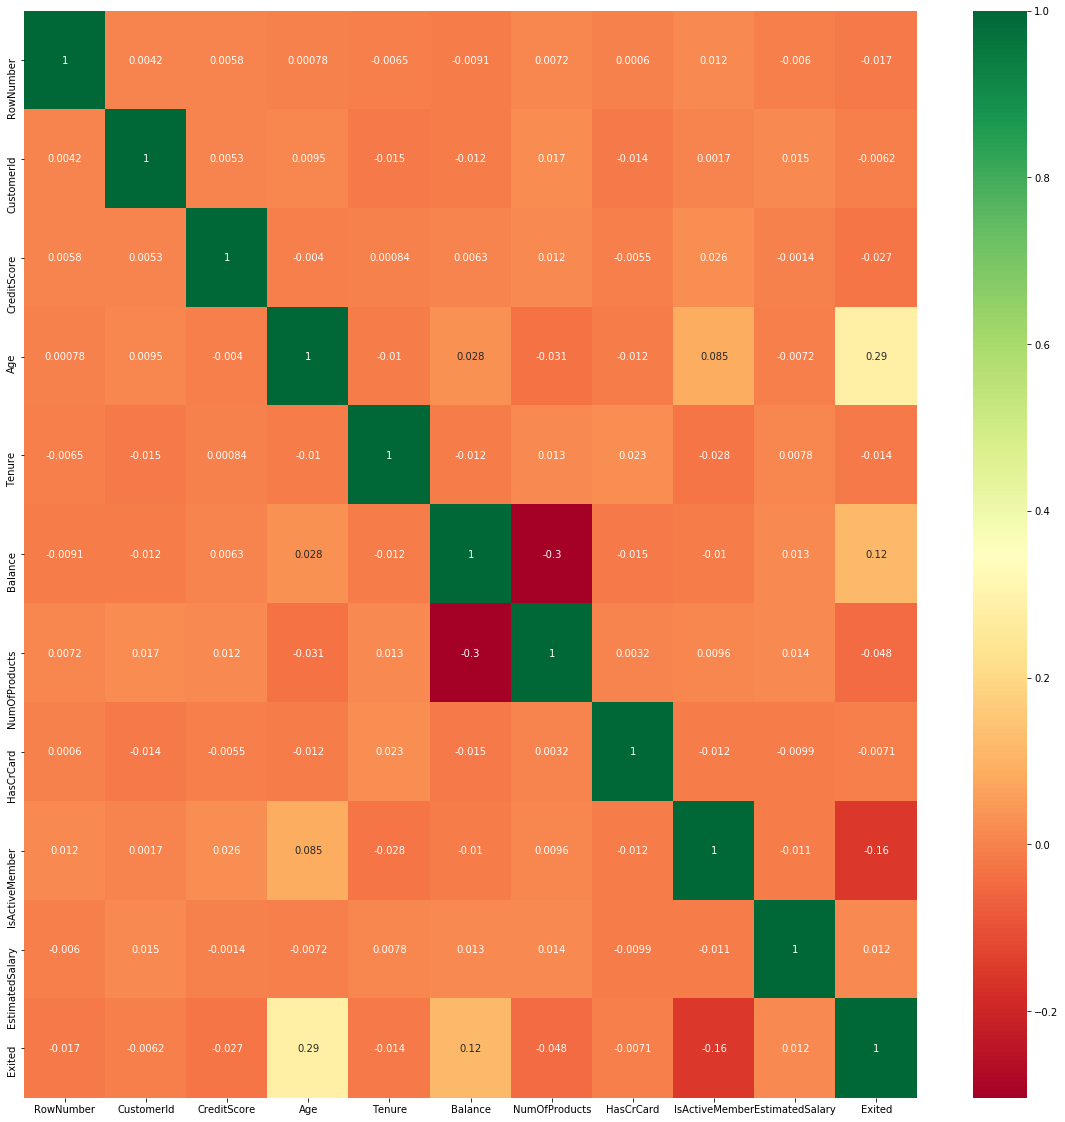

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn')

In [7]:
geography=pd.get_dummies(dataset['Geography'],drop_first=True)

In [8]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [11]:
dataset=pd.concat([dataset,geography,gender],axis=1)

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
dataset.drop(columns=['Geography','Gender'],axis=1,inplace=True)

In [14]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
dataset.shape

(10000, 15)

In [16]:
X=dataset.iloc[:,3:11]

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
remainingX=dataset.iloc[:,12:15]

In [19]:
remainingX.head()

,Germany,Spain,Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [20]:
X=pd.concat([X,remainingX],axis=1)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
Y=dataset[['Exited']]

In [23]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=0.5,max_iter=150,solver='liblinear')
lr.fit(X_train,Y_train)

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
print("Confusion Matrix:",confusion_matrix(Y_test,pred))
print()
print("Accuracy Score:",accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))

Confusion Matrix: [[1532   56]
 [ 331   81]]

Accuracy Score: 0.8065
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1588
           1       0.59      0.20      0.30       412

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



In [29]:
# Random state =200
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=200)


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=0.5,max_iter=150,solver='liblinear')
lr.fit(X_train,Y_train)

pred=lr.predict(X_test)


print("Confusion Matrix:",confusion_matrix(Y_test,pred))
print()
print("Accuracy Score:",accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))



C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: [[1508   65]
 [ 350   77]]

Accuracy Score: 0.7925
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1573
           1       0.54      0.18      0.27       427

    accuracy                           0.79      2000
   macro avg       0.68      0.57      0.57      2000
weighted avg       0.75      0.79      0.75      2000



##### With different random_state we are getting different output

## Cross validation

#### K Fold Cross validation

In [31]:
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(lr,X,Y,cv=8,verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was

In [32]:
cvs

array([0.8048, 0.8192, 0.8072, 0.8064, 0.808 , 0.8208, 0.8152, 0.7976])

In [33]:
cvs.mean()

0.8099000000000001

In the KFold cross validation there is chance that a perticular class of data is selected for training or testing.

So we need a method which selects the class for validations properly.

This can solved with the help of StratifiedKFold cross validation


## Stratified K Fold CV

In [34]:
from sklearn.model_selection import StratifiedKFold

sfcv=StratifiedKFold(n_splits=8)

In [35]:
sfcv.get_n_splits(X,Y)

8

In [36]:
split=sfcv.split(X,Y)

In [37]:
split

<generator object _BaseKFold.split at 0x000001C47C444748>

In [38]:
for train_index,test_index in sfcv.split(X,Y):
    print("Train",train_index,"Validation",test_index)

Train [1214 1215 1218 ... 9997 9998 9999] Validation [   0    1    2 ... 1255 1256 1257]
Train [   0    1    2 ... 9997 9998 9999] Validation [1214 1215 1218 ... 2521 2522 2523]
Train [   0    1    2 ... 9997 9998 9999] Validation [2427 2430 2431 ... 3788 3789 3791]
Train [   0    1    2 ... 9997 9998 9999] Validation [3615 3616 3617 ... 5037 5038 5039]
Train [   0    1    2 ... 9997 9998 9999] Validation [4884 4889 4892 ... 6270 6275 6277]
Train [   0    1    2 ... 9997 9998 9999] Validation [6137 6138 6150 ... 7520 7521 7523]
Train [   0    1    2 ... 9997 9998 9999] Validation [7425 7426 7433 ... 8781 8782 8785]
Train [   0    1    2 ... 8781 8782 8785] Validation [8600 8603 8625 ... 9997 9998 9999]


In [39]:
from sklearn.model_selection import StratifiedKFold

sfcv=StratifiedKFold(n_splits=15)
sfcv.get_n_splits(X,Y)

accuracy=[]

for train_index,test_index in sfcv.split(X,Y):
    print("Train",train_index,"Validation",test_index)
    
    X_train_new,X_test_new=X.iloc[train_index],X.iloc[test_index]
    Y_train_new,Y_test_new=Y.iloc[train_index],Y.iloc[test_index]
    
    lr.fit(X_train_new,Y_train_new)
    new_pred=lr.predict(X_test_new)
    score=accuracy_score(Y_test_new,new_pred)
     
    accuracy.append(score)
    
print("ACCURACY_SCORE:",accuracy)    

Train [ 644  645  653 ... 9997 9998 9999] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [1312 1314 1317 1318 1323 1328 1329 1335 1340 1341 1344 1345 1346 1347
 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361
 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375
 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389
 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403
 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417
 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431
 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445
 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459
 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473
 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487
 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501
 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515
 1516 1517 1518 1519 152

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 [   0    1    2 ... 9997 9998 9999] Validation [1965 1977 1985 1987 1988 1993 1994 1996 2005 2007 2009 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042
 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084
 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098
 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112
 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126
 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140
 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154
 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168
 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182
 2183 2184 2185 2186 2187 218

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [2549 2553 2560 2564 2568 2574 2575 2579 2580 2594 2600 2614 2617 2619
 2628 2629 2634 2639 2647 2654 2658 2659 2661 2662 2665 2668 2670 2676
 2689 2695 2698 2699 2700 2701 2702 2703 2704 2705 2706 2707 2708 2709
 2710 2711 2712 2713 2714 2715 2716 2717 2718 2719 2720 2721 2722 2723
 2724 2725 2726 2727 2728 2729 2730 2731 2732 2733 2734 2735 2736 2737
 2738 2739 2740 2741 2742 2743 2744 2745 2746 2747 2748 2749 2750 2751
 2752 2753 2754 2755 2756 2757 2758 2759 2760 2761 2762 2763 2764 2765
 2766 2767 2768 2769 2770 2771 2772 2773 2774 2775 2776 2777 2778 2779
 2780 2781 2782 2783 2784 2785 2786 2787 2788 2789 2790 2791 2792 2793
 2794 2795 2796 2797 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807
 2808 2809 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821
 2822 2823 2824 2825 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835
 2836 2837 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849
 2850 2851 2852 2853 285

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [3224 3229 3234 3238 3240 3245 3246 3250 3251 3254 3260 3262 3263 3268
 3272 3273 3274 3280 3285 3294 3300 3303 3314 3316 3317 3326 3328 3337
 3339 3349 3358 3365 3367 3368 3369 3370 3371 3372 3373 3374 3375 3376
 3377 3378 3379 3380 3381 3382 3383 3384 3385 3386 3387 3388 3389 3390
 3391 3392 3393 3394 3395 3396 3397 3398 3399 3400 3401 3402 3403 3404
 3405 3406 3407 3408 3409 3410 3411 3412 3413 3414 3415 3416 3417 3418
 3419 3420 3421 3422 3423 3424 3425 3426 3427 3428 3429 3430 3431 3432
 3433 3434 3435 3436 3437 3438 3439 3440 3441 3442 3443 3444 3445 3446
 3447 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457 3458 3459 3460
 3461 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471 3472 3473 3474
 3475 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485 3486 3487 3488
 3489 3490 3491 3492 3493 3494 3495 3496 3497 3498 3499 3500 3501 3502
 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516
 3517 3518 3519 3520 352

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [4529 4533 4535 4543 4547 4548 4549 4551 4555 4559 4563 4579 4592 4595
 4597 4606 4607 4608 4612 4619 4624 4629 4634 4640 4643 4648 4653 4654
 4667 4669 4671 4677 4686 4689 4697 4699 4705 4706 4707 4708 4709 4710
 4711 4712 4713 4714 4715 4716 4717 4718 4719 4720 4721 4722 4723 4724
 4725 4726 4727 4728 4729 4730 4731 4732 4733 4734 4735 4736 4737 4738
 4739 4740 4741 4742 4743 4744 4745 4746 4747 4748 4749 4750 4751 4752
 4753 4754 4755 4756 4757 4758 4759 4760 4761 4762 4763 4764 4765 4766
 4767 4768 4769 4770 4771 4772 4773 4774 4775 4776 4777 4778 4779 4780
 4781 4782 4783 4784 4785 4786 4787 4788 4789 4790 4791 4792 4793 4794
 4795 4796 4797 4798 4799 4800 4801 4802 4803 4804 4805 4806 4807 4808
 4809 4810 4811 4812 4813 4814 4815 4816 4817 4818 4819 4820 4821 4822
 4823 4824 4825 4826 4827 4828 4829 4830 4831 4832 4833 4834 4835 4836
 4837 4838 4839 4840 4841 4842 4843 4844 4845 4846 4847 4848 4849 4850
 4851 4852 4853 4854 485

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [5887 5888 5903 5904 5908 5915 5922 5923 5926 5927 5931 5933 5936 5940
 5942 5949 5950 5952 5955 5960 5962 5972 5976 5986 5989 6000 6001 6011
 6014 6022 6023 6028 6029 6036 6037 6038 6039 6040 6041 6042 6043 6044
 6045 6046 6047 6048 6049 6050 6051 6052 6053 6054 6055 6056 6057 6058
 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069 6070 6071 6072
 6073 6074 6075 6076 6077 6078 6079 6080 6081 6082 6083 6084 6085 6086
 6087 6088 6089 6090 6091 6092 6093 6094 6095 6096 6097 6098 6099 6100
 6101 6102 6103 6104 6105 6106 6107 6108 6109 6110 6111 6112 6113 6114
 6115 6116 6117 6118 6119 6120 6121 6122 6123 6124 6125 6126 6127 6128
 6129 6130 6131 6132 6133 6134 6135 6136 6137 6138 6139 6140 6141 6142
 6143 6144 6145 6146 6147 6148 6149 6150 6151 6152 6153 6154 6155 6156
 6157 6158 6159 6160 6161 6162 6163 6164 6165 6166 6167 6168 6169 6170
 6171 6172 6173 6174 6175 6176 6177 6178 6179 6180 6181 6182 6183 6184
 6185 6186 6187 6188 618

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [7258 7266 7269 7281 7282 7291 7308 7310 7314 7316 7317 7322 7324 7327
 7328 7337 7338 7339 7341 7353 7356 7357 7358 7359 7360 7361 7362 7363
 7364 7365 7366 7367 7368 7369 7370 7371 7372 7373 7374 7375 7376 7377
 7378 7379 7380 7381 7382 7383 7384 7385 7386 7387 7388 7389 7390 7391
 7392 7393 7394 7395 7396 7397 7398 7399 7400 7401 7402 7403 7404 7405
 7406 7407 7408 7409 7410 7411 7412 7413 7414 7415 7416 7417 7418 7419
 7420 7421 7422 7423 7424 7425 7426 7427 7428 7429 7430 7431 7432 7433
 7434 7435 7436 7437 7438 7439 7440 7441 7442 7443 7444 7445 7446 7447
 7448 7449 7450 7451 7452 7453 7454 7455 7456 7457 7458 7459 7460 7461
 7462 7463 7464 7465 7466 7467 7468 7469 7470 7471 7472 7473 7474 7475
 7476 7477 7478 7479 7480 7481 7482 7483 7484 7485 7486 7487 7488 7489
 7490 7491 7492 7493 7494 7495 7496 7497 7498 7499 7500 7501 7502 7503
 7504 7505 7506 7507 7508 7509 7510 7511 7512 7513 7514 7515 7516 7517
 7518 7519 7520 7521 752

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train [   0    1    2 ... 9997 9998 9999] Validation [8523 8531 8532 8535 8543 8550 8554 8562 8563 8565 8566 8577 8585 8590
 8595 8597 8600 8603 8625 8626 8635 8636 8641 8648 8657 8662 8671 8673
 8674 8679 8680 8683 8688 8693 8702 8703 8704 8705 8706 8707 8708 8709
 8710 8711 8712 8713 8714 8715 8716 8717 8718 8719 8720 8721 8722 8723
 8724 8725 8726 8727 8728 8729 8730 8731 8732 8733 8734 8735 8736 8737
 8738 8739 8740 8741 8742 8743 8744 8745 8746 8747 8748 8749 8750 8751
 8752 8753 8754 8755 8756 8757 8758 8759 8760 8761 8762 8763 8764 8765
 8766 8767 8768 8769 8770 8771 8772 8773 8774 8775 8776 8777 8778 8779
 8780 8781 8782 8783 8784 8785 8786 8787 8788 8789 8790 8791 8792 8793
 8794 8795 8796 8797 8798 8799 8800 8801 8802 8803 8804 8805 8806 8807
 8808 8809 8810 8811 8812 8813 8814 8815 8816 8817 8818 8819 8820 8821
 8822 8823 8824 8825 8826 8827 8828 8829 8830 8831 8832 8833 8834 8835
 8836 8837 8838 8839 8840 8841 8842 8843 8844 8845 8846 8847 8848 8849
 8850 8851 8852 8853 885

C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACCURACY_SCORE: [0.8035982008995503, 0.8050974512743628, 0.8185907046476761, 0.8200899550224887, 0.8110944527736131, 0.7976011994002998, 0.7961019490254873, 0.8110944527736131, 0.8110944527736131, 0.8140929535232384, 0.8228228228228228, 0.8198198198198198, 0.8093093093093093, 0.8018018018018018, 0.8033033033033034]


In [40]:
accuracy

[0.8035982008995503,
 0.8050974512743628,
 0.8185907046476761,
 0.8200899550224887,
 0.8110944527736131,
 0.7976011994002998,
 0.7961019490254873,
 0.8110944527736131,
 0.8110944527736131,
 0.8140929535232384,
 0.8228228228228228,
 0.8198198198198198,
 0.8093093093093093,
 0.8018018018018018,
 0.8033033033033034]

In [41]:
import numpy as np

In [42]:
#converting the accuracy list into the array and then finding the mean of it
np.array(accuracy).mean()

0.8097008552780667